In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv(r'/content/Placement_Data.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


check first 4 rows of dataframe

In [ ]:
df.head(4)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN


get all features

In [ ]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

find no. of records and columns

In [ ]:
df.shape

(215, 15)

use .info() method to find no. of non-null entries and datatypes of each feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


what is average of ssc p (10 th grade percentage)

In [ ]:
df['ssc_p'].mean()

67.30339534883721

what is max. 10th grade percentage

In [ ]:
df['ssc_p'].max()

89.4

How many toppers were there in 10th grade

In [ ]:
df[(df['ssc_p'] == df['ssc_p'].max())].shape[0]

1

Is the student who got highest ssc marks was placed or not

In [ ]:
df[(df['ssc_p'] == df['ssc_p'].max())].status

145    Placed
Name: status, dtype: object

How many students are placed or unplaced

In [ ]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

What is the most common degree of placed students

In [ ]:
df[(df['status'] == 'Placed')].degree_t.value_counts().head(1)

Comm&Mgmt    102
Name: degree_t, dtype: int64

How many unique degrees are there in dataset

In [ ]:
df['degree_t'].unique().shape[0]

3

Is there any correlation between 10th and 12th percentage

In [ ]:
df[['ssc_p', 'hsc_p']].corr()

,ssc_p,hsc_p
ssc_p,1.000000,0.511472
hsc_p,0.511472,1.000000


Find correlation matrix

In [ ]:
df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


DATA PREPROCESSING

Identify the column which can be removed (only 1) and remove it

In [ ]:
df.drop('sl_no', axis = 1, inplace = True)

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


check no. of Null values in each column

In [ ]:
df.isnull().sum(axis = 0)

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
df[(df['status'] == 'Not Placed')]
#all students those are not placed are very Nan salary.

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


Fill the missing values with appropriate values.

In [ ]:
df['salary'].fillna(0, inplace =  True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          215 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


DATA VISUALIZATION

Draw a scatter plot between 10th and 12th percentage.

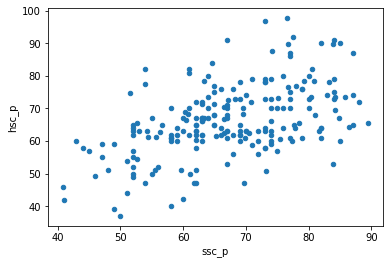

In [ ]:
df.plot.scatter('ssc_p', 'hsc_p')

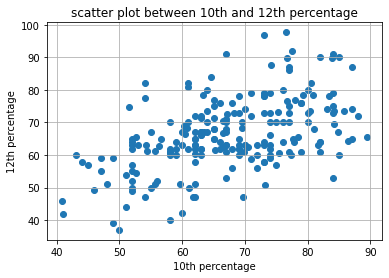

In [ ]:
plt.scatter(df['ssc_p'], df['hsc_p'])
plt.xlabel("10th percentage")
plt.ylabel("12th percentage")
plt.title('scatter plot between 10th and 12th percentage')
plt.grid()
plt.show()
#matplotlib way of making scatter plot

coloring the matplotlib scatter plot

In [ ]:

colors = {'Placed': 'tab:green', 'Not Placed': 'tab:red'}
#it is assigning different colors.

In [ ]:
df['status'].map(colors)
#it is giving colors on basis of status column

0      tab:green
1      tab:green
2      tab:green
3        tab:red
4      tab:green
         ...    
210    tab:green
211    tab:green
212    tab:green
213    tab:green
214      tab:red
Name: status, Length: 215, dtype: object

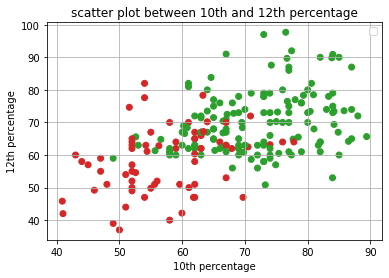

In [ ]:
plt.scatter(df['ssc_p'], df['hsc_p'], c = df['status'].map(colors))
plt.xlabel("10th percentage")
plt.ylabel("12th percentage")
plt.title('scatter plot between 10th and 12th percentage')
plt.grid()
plt.legend()
plt.show()
#matplotlib way of making scatter plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


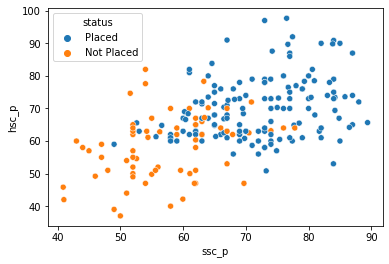

In [ ]:
sns.scatterplot(df['ssc_p'], df['hsc_p'], hue = df['status'])
#seaborn way of making scatter plot

RESULT FROM SCATTER PLOT:
(i) Mostly 10th percentage is in 60 - 80 and for 12th also it is 60 - 80.
(ii) The student who has got lowest perc. in 10th, he has also got lowest perc. in 12th. (40 %).
(iii) Topper of 10th was not able to score well in 12th.
(iv) students having less marks in 10th and 12th, they are not placed whereas students with good marks in 10 and 12th are placed.
(v) No. of placed students are greater than no. of unplaced students.
such data is called unbalanced data where one category data is more than other category data.


Draw pairplots between all continuos column

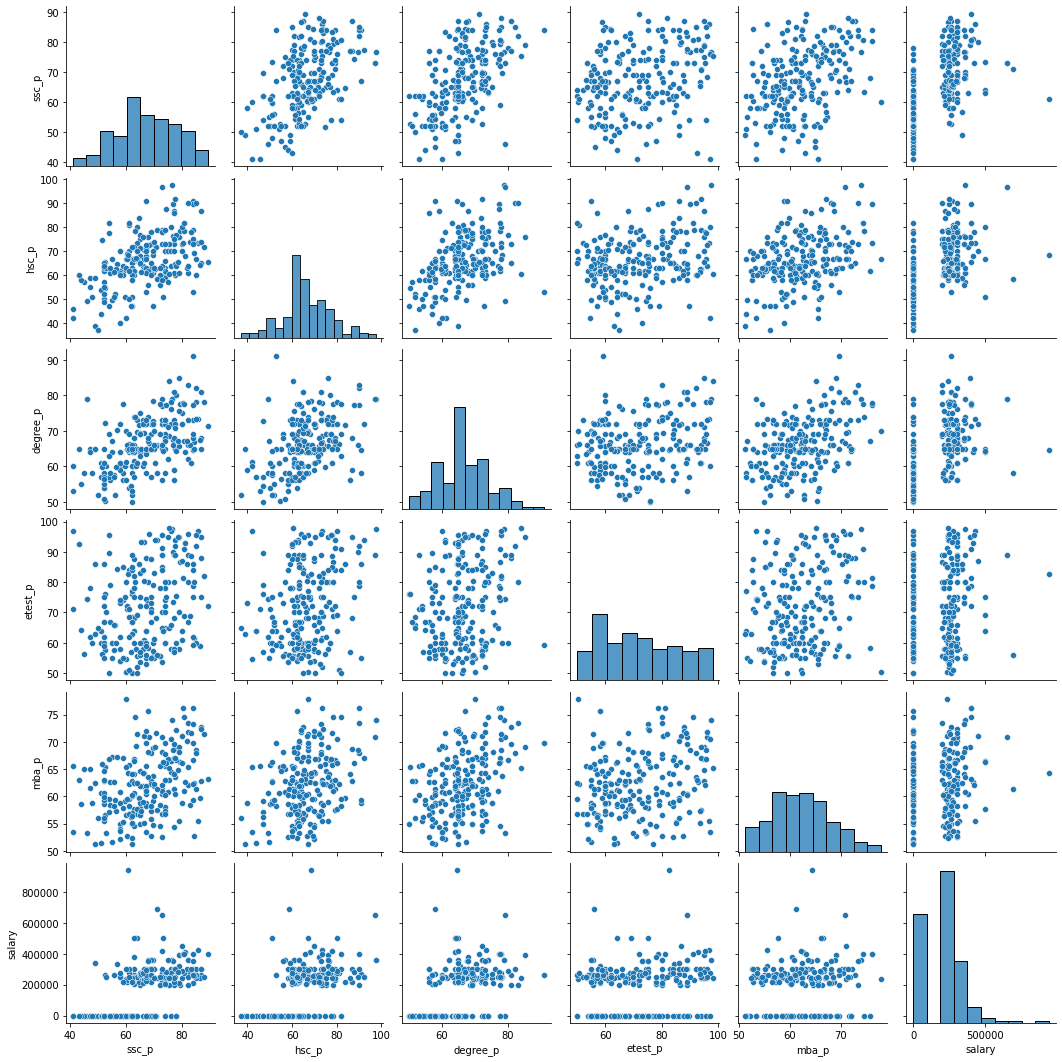

In [ ]:
sns.pairplot(df)
#it will give histogram if plotted between 2 same  parameters
#it will give scatter plot if plotted  between 2 different parameters

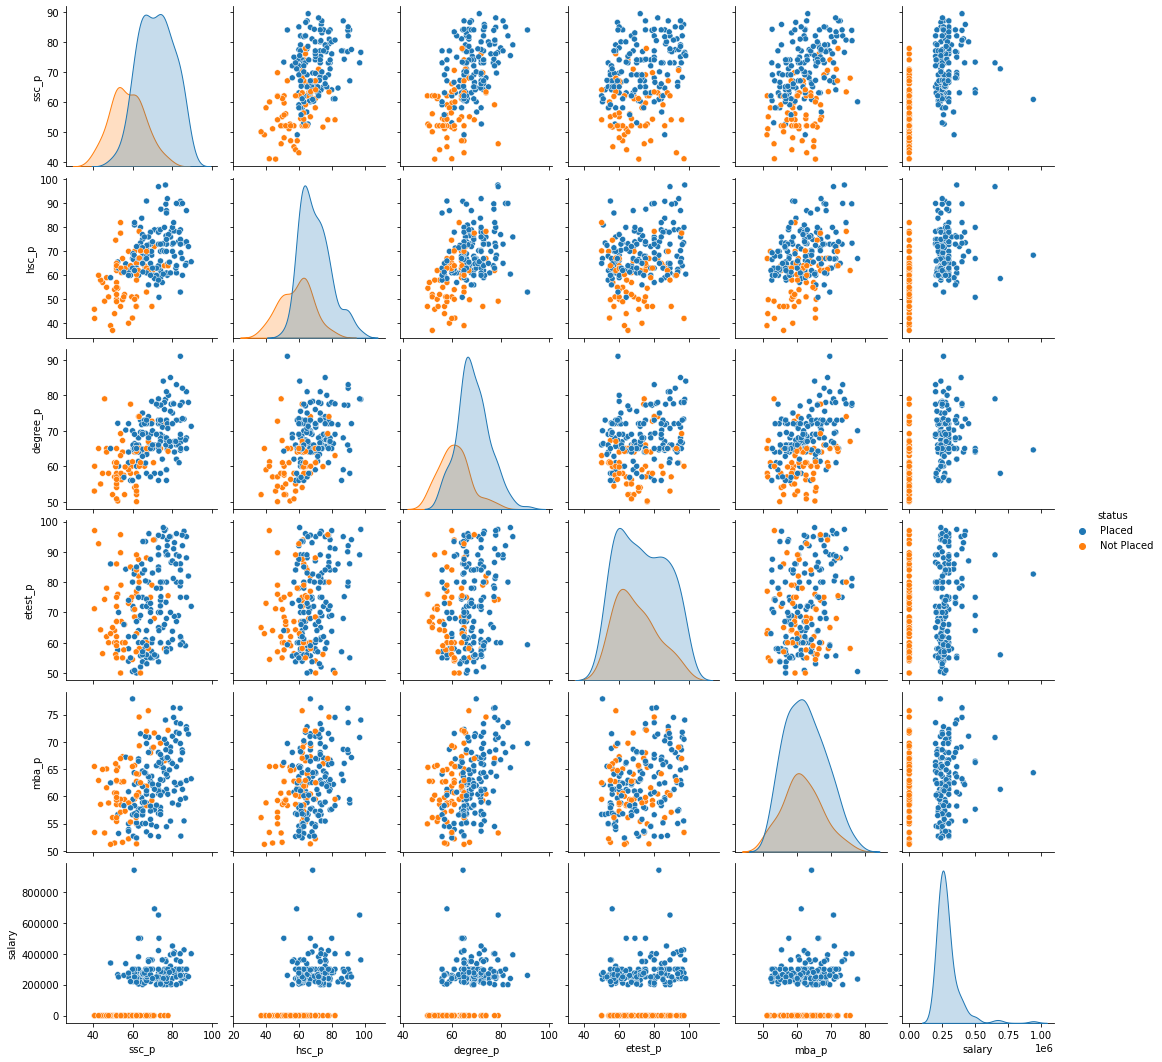

In [ ]:
sns.pairplot(df, hue = 'status')
#here instead of histograms , we are getting kernel density approximations (KDE)

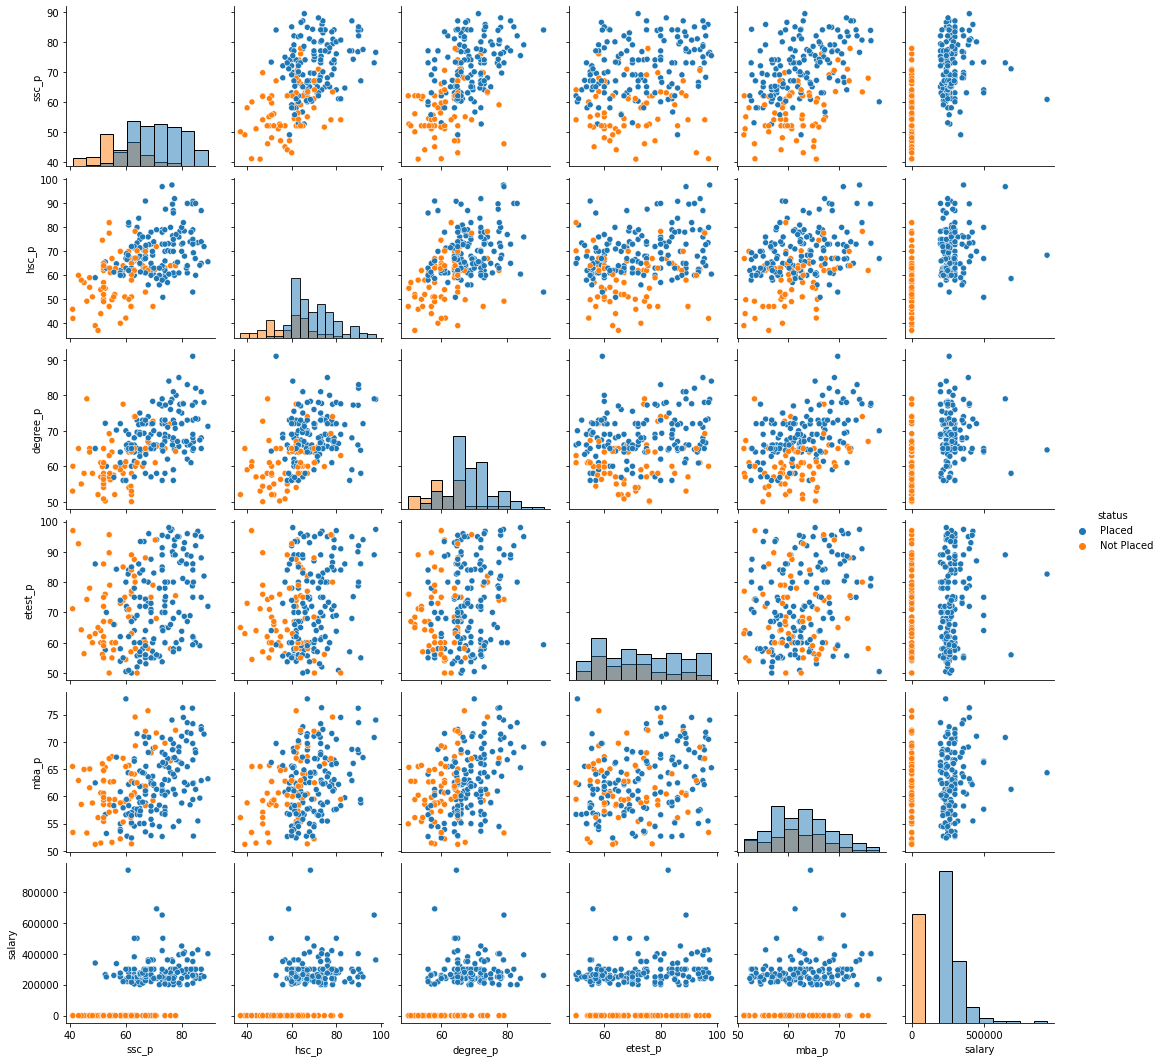

In [ ]:

sns.pairplot(df, hue = 'status', diag_kind = 'hist')
#now it will show histograms instead of KDEs

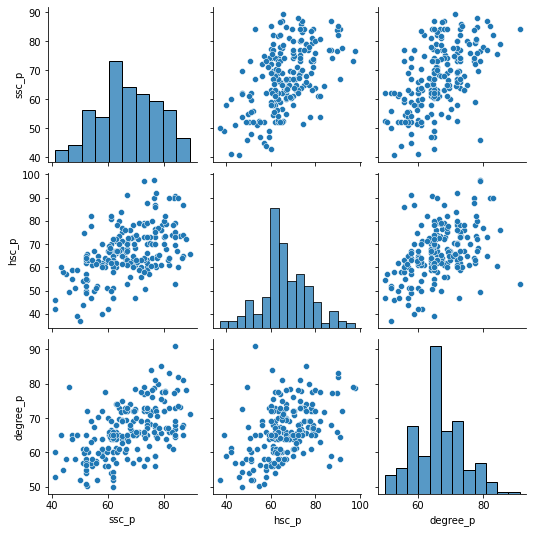

In [ ]:
sns.pairplot(df[['ssc_p', 'hsc_p', 'degree_p']])
#so, here we are plotting paorplot between 3 parameters only

Draw a boxplot for 10th percentage of students

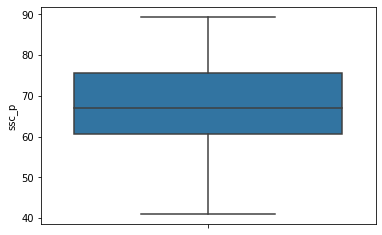

In [ ]:
sns.boxplot(y = 'ssc_p', data = df)

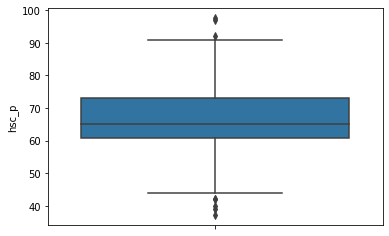

In [ ]:
sns.boxplot(y = 'hsc_p', data = df)
#it is showing that there are some outliers.

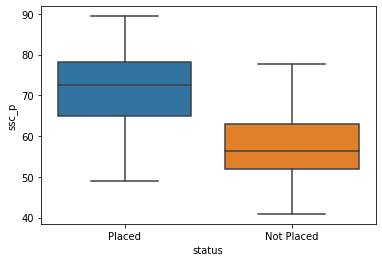

In [ ]:
sns.boxplot(y = 'ssc_p', data = df, x = 'status')

Line plot

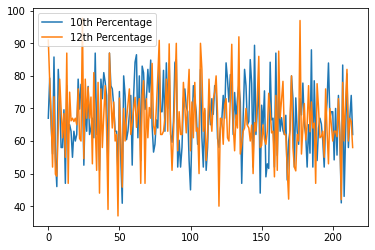

In [ ]:
plt.plot(df['ssc_p'], label = "10th Percentage")
plt.plot(df['hsc_p'], label = "12th Percentage")
plt.legend()
#matplotlib way of plotting the line plot
#we are not plotting here seaborn way of plotting line plot.

Heat maps

In [ ]:
df.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

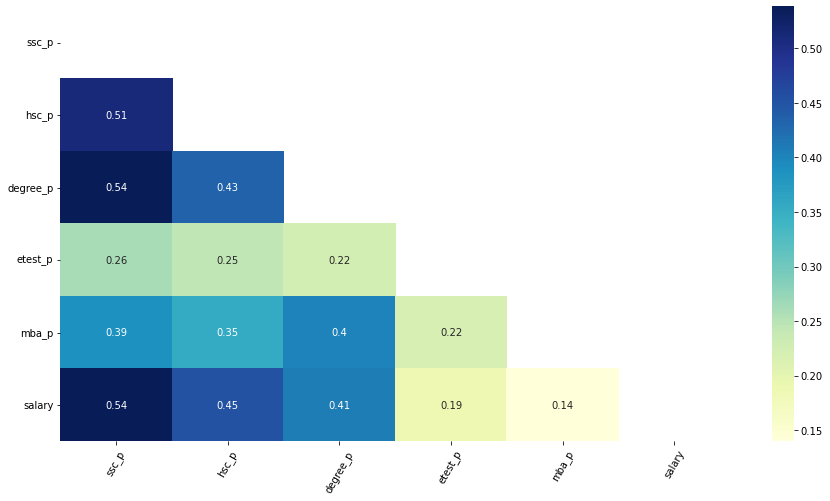

In [ ]:
mask = np.triu(np.ones_like(df.corr()))
#mask here is removing upper triangle. 
 
# plotting a triangle correlation heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)
plt.gcf().set_size_inches(15, 8)
plt.xticks(rotation = 60)
#rotation here is rotating labels of x axis at 60 degree

hist plot

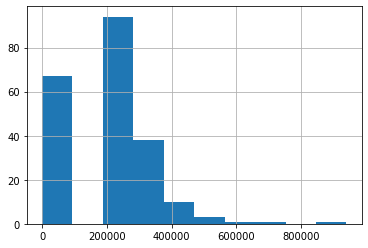

In [ ]:
df['salary'].hist()

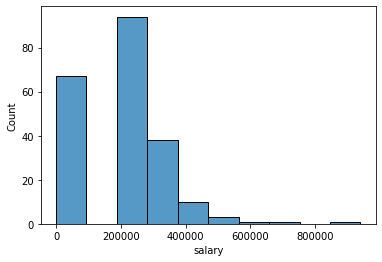

In [ ]:
sns.histplot(df['salary'])

(array([67.,  0., 94., 38., 10.,  3.,  1.,  1.,  0.,  1.]),
 array([     0.,  94000., 188000., 282000., 376000., 470000., 564000.,
        658000., 752000., 846000., 940000.]),
 <a list of 10 Patch objects>)

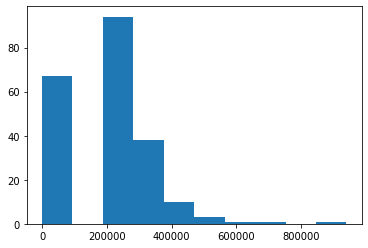

In [ ]:
plt.hist(df['salary'])

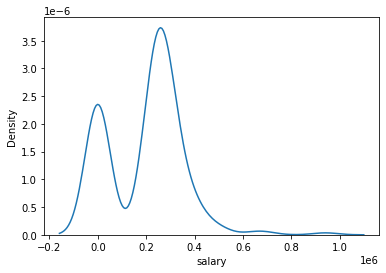

In [ ]:
sns.kdeplot(df['salary'])
#kde plots

Outliers analysis

After outleirs removal, ML model gives more accuracy or R2 value generally, but it is not necessary.

In [ ]:
#METHOD 01: mam's way of doing it.

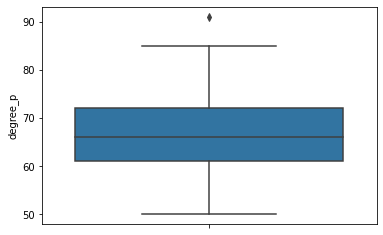

In [ ]:
sns.boxplot(y = 'degree_p', data = df)

Removing outliers from only one column

In [ ]:
Percentile_25 = df['degree_p'].quantile(0.25)
Percentile_75 = df['degree_p'].quantile(0.75)
IQR = Percentile_75 - Percentile_25
print(IQR)

11.0


In [ ]:
Upper_limit = Percentile_75 + (1.5 * IQR)
Lower_limit = Percentile_25 - (1.5 * IQR)
print(Upper_limit)
print(Lower_limit)

88.5
44.5


In [ ]:
df = df[df['degree_p'] < Upper_limit]
df = df[df['degree_p'] > Lower_limit]

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


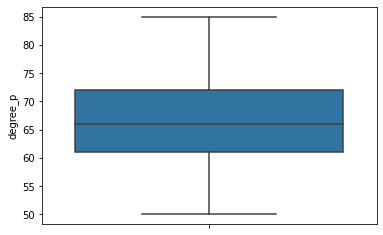

In [ ]:
sns.boxplot(y = 'degree_p', data = df)

Removing outliers from all columns (considering here only independent variables, not target value i.e. salary, although we can take that as well)

In [ ]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [ ]:
col = ['ssc_p', 'hsc_p', 'degree_p']

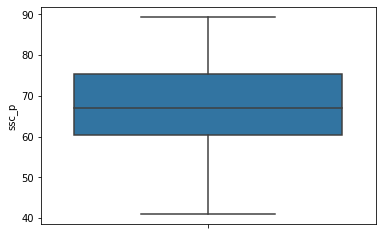

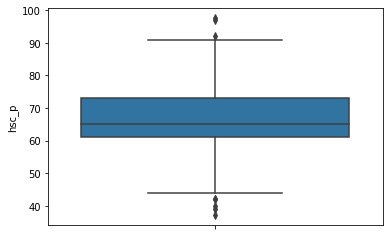

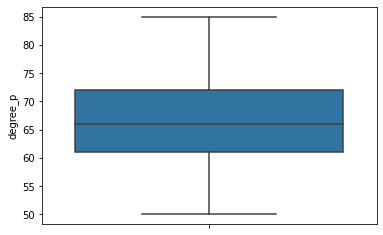

In [ ]:
for c in col:
    plt.figure()
    sns.boxplot(y = c, data = df)

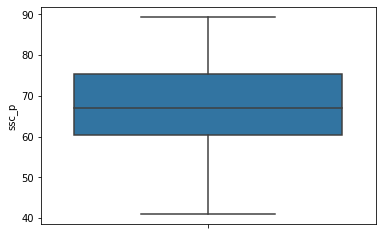

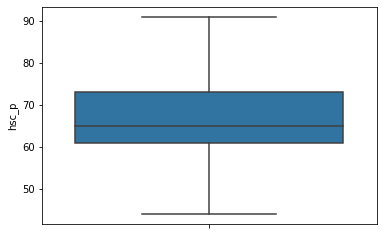

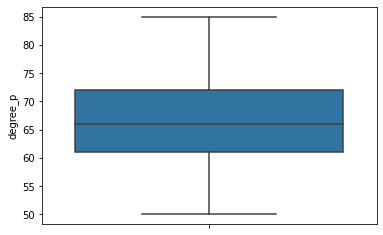

In [ ]:
for c in col:
    Percentile_25 = df[c].quantile(0.25)
    Percentile_75 = df[c].quantile(0.75)
    IQR = Percentile_75 - Percentile_25
    Upper_limit = Percentile_75 + (1.5 * IQR)
    Lower_limit = Percentile_25 - (1.5 * IQR)
    df = df[df[c] < Upper_limit]
    df = df[df[c] > Lower_limit]
    plt.figure()
    sns.boxplot(y = c, data = df)

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
df["gender"].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df["ssc_b"].unique()

array(['Central', 'Others'], dtype=object)

In [ ]:
df["hsc_b"].unique()

array(['Others', 'Central'], dtype=object)

In [ ]:
df["hsc_s"].unique()

array(['Science', 'Arts', 'Commerce'], dtype=object)

In [ ]:
df["degree_t"].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [ ]:
df["workex"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df["specialisation"].unique()

array(['Mkt&Fin', 'Mkt&HR'], dtype=object)

In [ ]:
df["status"].unique()

array(['Placed', 'Not Placed'], dtype=object)

Label encoding on some categorical columns.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
categ_col = ["gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation", "status" ]

In [ ]:
for z in categ_col:
    df[z] = le.fit_transform(df[z])

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          205 non-null    int64  
 1   ssc_p           205 non-null    float64
 2   ssc_b           205 non-null    int64  
 3   hsc_p           205 non-null    float64
 4   hsc_b           205 non-null    int64  
 5   hsc_s           205 non-null    int64  
 6   degree_p        205 non-null    float64
 7   degree_t        205 non-null    int64  
 8   workex          205 non-null    int64  
 9   etest_p         205 non-null    float64
 10  specialisation  205 non-null    int64  
 11  mba_p           205 non-null    float64
 12  status          205 non-null    int64  
 13  salary          205 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 24.0 KB


LINEAR REGRESSION MODEL

In [ ]:
X = df.iloc[:,0:-2].values
#ignoring the "status" column
X

array([[ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       [ 1.  , 56.  ,  0.  , ..., 66.  ,  1.  , 59.43],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [ ]:
Y = df.iloc[:, -1].values
Y

array([200000., 250000.,      0., 425000.,      0.,      0., 252000.,
       231000.,      0., 260000., 250000.,      0., 218000.,      0.,
       200000., 300000.,      0.,      0., 236000., 265000., 393000.,
       360000., 300000.,      0., 240000., 265000., 350000.,      0.,
       250000.,      0., 278000., 260000.,      0., 300000.,      0.,
       320000., 240000., 411000., 287000.,      0., 300000., 200000.,
            0.,      0., 204000., 250000., 200000.,      0.,      0.,
       450000., 216000., 220000., 240000., 360000., 268000., 265000.,
       260000., 300000., 240000.,      0., 240000.,      0., 275000.,
       275000.,      0., 275000., 360000., 240000., 240000., 218000.,
       336000.,      0., 230000., 500000., 270000.,      0., 240000.,
       300000.,      0., 300000., 300000., 400000., 220000.,      0.,
       210000., 210000., 300000.,      0., 230000.,      0., 260000.,
       420000., 300000.,      0., 220000.,      0.,      0., 380000.,
       300000., 2400

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
#we can also use min_max scaling instead of standard scaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train  = sc.fit_transform(X_train)
X_train

array([[ 0.69970232,  0.82216156, -0.96562541, ...,  1.28296249,
        -0.8502303 ,  1.07567973],
       [-1.4291792 , -1.33648301, -0.96562541, ...,  1.72348604,
        -0.8502303 ,  0.78427439],
       [ 0.69970232,  1.80163464, -0.96562541, ...,  0.11343093,
         1.17615192,  1.75260891],
       ...,
       [-1.4291792 , -0.14780208,  1.03559827, ..., -0.97813186,
        -0.8502303 ,  0.30101211],
       [ 0.69970232, -0.57572722, -0.96562541, ...,  0.89311864,
         1.17615192, -1.35149148],
       [ 0.69970232,  1.23106779,  1.03559827, ...,  1.5168688 ,
        -0.8502303 , -0.00849294]])

In [ ]:
X_test = sc.transform(X_test)
X_test

array([[ 0.69970232, -0.48063274, -0.96562541,  0.05310624, -1.26491106,
        -0.7272763 ,  1.04651611, -0.68371301, -0.75592895,  0.65921232,
        -0.8502303 , -0.39220681],
       [ 0.69970232, -0.48063274, -0.96562541,  0.56978831, -1.26491106,
        -0.7272763 ,  0.22714975, -0.68371301, -0.75592895,  0.34733724,
         1.17615192, -0.39220681],
       [ 0.69970232, -0.14780208, -0.96562541, -0.41190761, -1.26491106,
        -0.7272763 , -0.74243378, -0.68371301, -0.75592895,  1.54805631,
        -0.8502303 , -1.37140116],
       [ 0.69970232, -0.48063274, -0.96562541, -0.67024865, -1.26491106,
        -0.7272763 , -1.27502192, -0.68371301,  1.32287566,  0.34733724,
        -0.8502303 , -1.45827977],
       [ 0.69970232,  1.80163464,  1.03559827,  2.11983451,  0.79056942,
        -0.7272763 ,  0.22714975, -0.68371301, -0.75592895,  1.67280634,
         1.17615192,  0.05304608],
       [ 0.69970232,  0.66050095,  1.03559827,  0.39308304,  0.79056942,
        -0.7272763 ,  

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [ ]:
lm.intercept_

207958.04195804213

In [ ]:
lm.coef_

array([ 32748.71153976,  55405.9425305 ,  22223.45671174,  19017.58067416,
       -20079.92910234,  17076.84132355,  25317.31137862, -18125.18762805,
        24300.1103229 ,  -8645.40750556, -27347.07266678, -16831.18195258])

In [ ]:
predictions = lm.predict(X_test)
predictions

array([241444.34041114, 177806.89524755, 214546.87648077, 240067.5154121 ,
       317983.05199166, 275399.09067925, 280533.77616762, 202990.34685577,
       224103.85985821, 326171.90761159, 231406.88256742, 259894.18873341,
       296204.56897364, 245578.75249165,  87693.59492637, 146379.4287592 ,
       178338.11954456, 163034.04287493, 353457.49286429, 255617.64886377,
        96962.6897236 , 361147.61628379, -33874.11587503, 252165.51792091,
         3910.35574043, 113764.23969805, 123069.44067431, 262497.41622762,
       256155.35256298, 210920.05244507,  62815.47872352, 162511.55967398,
        88994.46876924,   5732.87543098,  90039.24049244, 198106.8452664 ,
       212102.67449439,  70999.17595093, 278555.79714384,  75767.00115773,
        98391.51043288, 173782.64991253, 206319.39448763, 155993.01624367,
        43122.60428568, 128448.34242969, 302467.69053499, 160737.74393694,
       162327.45020928, 327153.42572937, 233197.9240423 ,  60075.56666538,
       225098.79683112,  

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
print('Rsquarevalue:', metrics.explained_variance_score(Y_test, predictions))

MAE: 94422.61170990655
MSE: 13820467214.023556
RMSE: 117560.48321618773
Rsquarevalue: 0.2643685176223035


LOGISTIC REGRESSION

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
X_log = df.iloc[:,0:-2]
#ignoring the "status"  and "salary" column
X_log

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23


In [ ]:
Y_log = df.iloc[:, -2].values
Y_log

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_log_train, X_log_test, Y_log_train, Y_log_test = train_test_split(X_log, Y_log, test_size=0.3, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
#we can also use min_max scaling instead of standard scaler

In [ ]:
sc1 = StandardScaler()

In [ ]:
X_log_train  = sc1.fit_transform(X_log_train)
X_log_train

array([[ 0.69970232,  0.82216156, -0.96562541, ...,  1.28296249,
        -0.8502303 ,  1.07567973],
       [-1.4291792 , -1.33648301, -0.96562541, ...,  1.72348604,
        -0.8502303 ,  0.78427439],
       [ 0.69970232,  1.80163464, -0.96562541, ...,  0.11343093,
         1.17615192,  1.75260891],
       ...,
       [-1.4291792 , -0.14780208,  1.03559827, ..., -0.97813186,
        -0.8502303 ,  0.30101211],
       [ 0.69970232, -0.57572722, -0.96562541, ...,  0.89311864,
         1.17615192, -1.35149148],
       [ 0.69970232,  1.23106779,  1.03559827, ...,  1.5168688 ,
        -0.8502303 , -0.00849294]])

In [ ]:
X_log_test = sc1.transform(X_log_test)
X_log_test

array([[ 0.69970232, -0.48063274, -0.96562541,  0.05310624, -1.26491106,
        -0.7272763 ,  1.04651611, -0.68371301, -0.75592895,  0.65921232,
        -0.8502303 , -0.39220681],
       [ 0.69970232, -0.48063274, -0.96562541,  0.56978831, -1.26491106,
        -0.7272763 ,  0.22714975, -0.68371301, -0.75592895,  0.34733724,
         1.17615192, -0.39220681],
       [ 0.69970232, -0.14780208, -0.96562541, -0.41190761, -1.26491106,
        -0.7272763 , -0.74243378, -0.68371301, -0.75592895,  1.54805631,
        -0.8502303 , -1.37140116],
       [ 0.69970232, -0.48063274, -0.96562541, -0.67024865, -1.26491106,
        -0.7272763 , -1.27502192, -0.68371301,  1.32287566,  0.34733724,
        -0.8502303 , -1.45827977],
       [ 0.69970232,  1.80163464,  1.03559827,  2.11983451,  0.79056942,
        -0.7272763 ,  0.22714975, -0.68371301, -0.75592895,  1.67280634,
         1.17615192,  0.05304608],
       [ 0.69970232,  0.66050095,  1.03559827,  0.39308304,  0.79056942,
        -0.7272763 ,  

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_R = LogisticRegression()
log_R.fit(X_log_train,Y_log_train)

LogisticRegression()

In [ ]:
predictions_log = log_R.predict(X_log_test)
predictions_log

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
Y_log_test

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_log_test, predictions_log)

array([[13,  8],
       [ 5, 36]])

In [ ]:
TN, FP, FN, TP = confusion_matrix(Y_log_test, predictions_log).ravel()


In [ ]:
print(TN, FP, FN, TP)

13 8 5 36


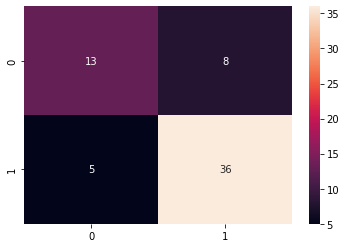

In [ ]:
sns.heatmap(confusion_matrix(Y_log_test, predictions_log), annot = True)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_log_test, predictions_log)

0.7903225806451613

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(Y_log_test, predictions_log)

0.7485481997677119

find out no. of 0 classes in Y_test

In [ ]:
S0 = sum(Y_log_test == 0)
S0
#support for 0 class

21

find out no. of 1 classes in Y_test

In [ ]:
S1 = sum(Y_log_test == 1)
S1
#support for 1 class

41

find precision

In [ ]:
P1 = TP / (TP + FP)
P1
#precision for 1 class

0.8181818181818182

In [ ]:
P0 = TN / (TN + FN)
P0
#precision for 0 class

0.7222222222222222

find recall

In [ ]:
R1 = TP / (TP + FN)
R1
#recall for 1 class

0.8780487804878049

In [ ]:
R0 = TN / (TN + FP)
R0
#recall for 0 class

0.6190476190476191

find F- score

In [ ]:
F1 = (2*P1*R1)/ (P1 + R1)
F1
#Fscore for 1 class

0.8470588235294119

In [ ]:
F0 = (2*P0*R0)/ (P0 + R0)
F0
#Fscore for 0 class

0.6666666666666666

macro average 

In [ ]:
(P0 + P1)/2
#macro av of precision

0.7702020202020202

In [ ]:
(R0 +R1)/2
#macro av of recall

0.7485481997677119

In [ ]:
(F0 +F1)/2
#macro av of F-score

0.7568627450980392

weighted average

In [ ]:
((S0/(S0 + S1)) * P0) + ((S1/(S0 + S1)) * P1)
#weighted av for precision

0.7856793743890518

In [ ]:
((S0/(S0 + S1)) * R0) + ((S1/(S0 + S1)) * R1)
#weighted av for recall

0.7903225806451613

In [ ]:
((S0/(S0 + S1)) * F0) + ((S1/(S0 + S1)) * F1)
#weighted av for Fscore

0.7859582542694497

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_log_test, predictions_log))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67        21
           1       0.82      0.88      0.85        41

    accuracy                           0.79        62
   macro avg       0.77      0.75      0.76        62
weighted avg       0.79      0.79      0.79        62



DECISION TREE

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
X_D = df.iloc[:, 0:-2].values
X_D

array([[ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       [ 1.  , 56.  ,  0.  , ..., 66.  ,  1.  , 59.43],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [ ]:
Y_D = df.iloc[:, -2].values
Y_D
#we are not taking salary because there is relation between status and salary

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_D_train, X_D_test, Y_D_train, Y_D_test = train_test_split(X_D, Y_D, test_size = 0.3, random_state = 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#decision tree is not a linear model

In [ ]:
DTC = DecisionTreeClassifier()

In [ ]:
DTC.fit(X_D_train, Y_D_train)

DecisionTreeClassifier()

In [ ]:
Predict_D = DTC.predict(X_D_test)
Predict_D

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_D_test, Predict_D)

array([[12,  9],
       [ 7, 34]])

In [ ]:
TP, FP, FN, TN = confusion_matrix(Y_D_test, Predict_D).ravel()
TP, FP, FN, TN

(12, 9, 7, 34)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_D_test, Predict_D)

0.7419354838709677

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_D_test, Predict_D))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60        21
           1       0.79      0.83      0.81        41

    accuracy                           0.74        62
   macro avg       0.71      0.70      0.70        62
weighted avg       0.74      0.74      0.74        62



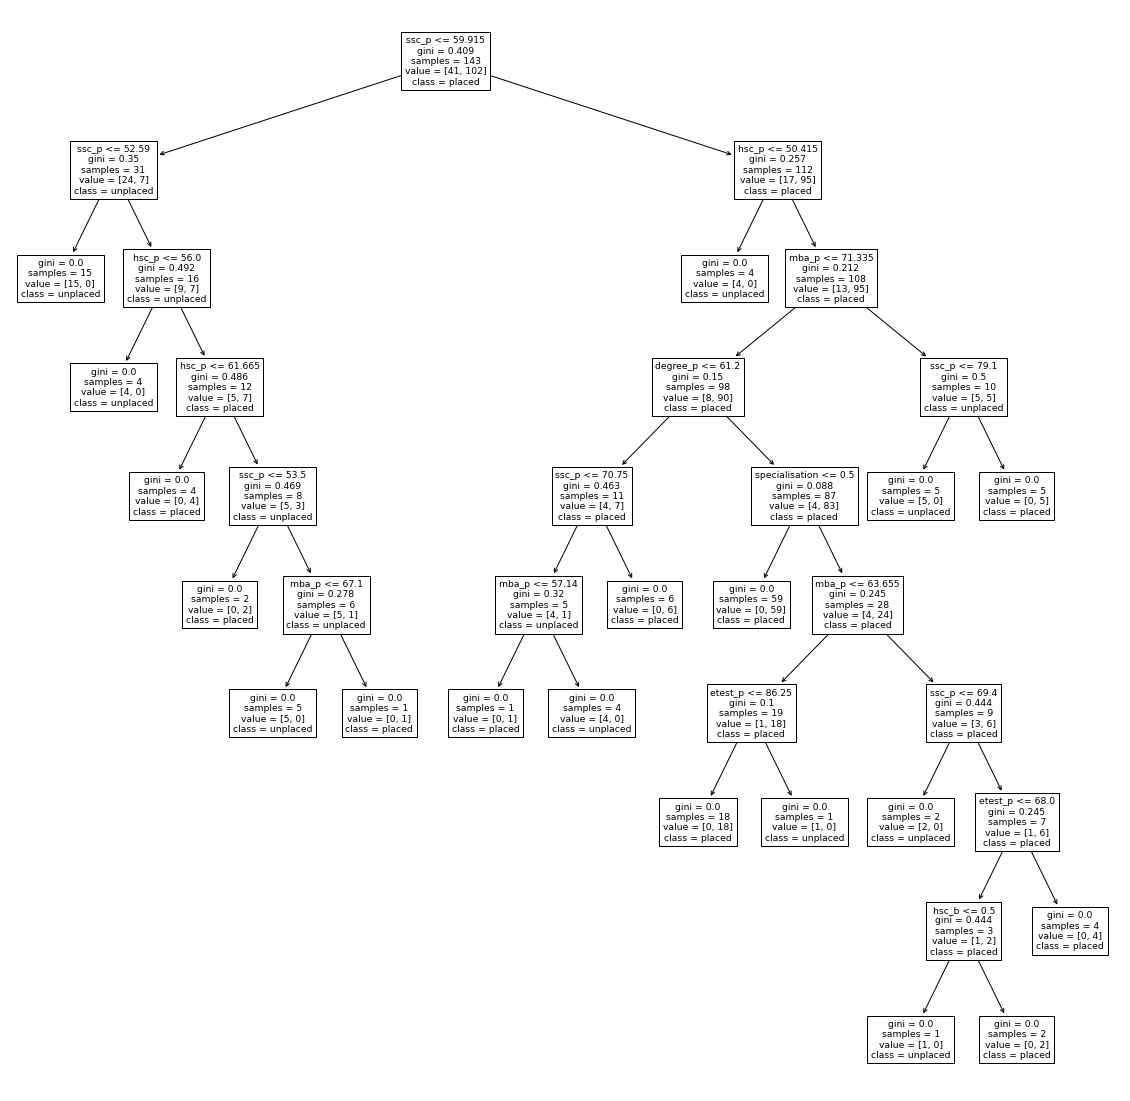

In [ ]:
from sklearn import tree
plt.figure(figsize = (20, 20))
tree.plot_tree(DTC, feature_names = df.columns[0:-2], class_names = ["unplaced", "placed"])
plt.show()


In [ ]:
df.head(1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0


In [ ]:
#by decision tree we can explain the output.
#by tracing the tree from starting to end.
#for every split, left node is due to TRUE and right node is due to FALSE.
#hence, we got that the status = Placed by looking at decision tree for df.head(1)

RANDOM FOREST

In [ ]:
[int(x) for x in np.linspace(10, 120, 12)]

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

In [ ]:
#going to select one value from the list
N_estimators = [int(x) for x in np.linspace(10, 120, 12)]
#N_estimators means no. of DT in RF
Max_features = ["sqrt", "log2"]
#Max_features means that (i.e. feature randomness) take sq. root or log to base of 2 of total no. of features and take them as no. of features at each split.
Max_depth = [int(x) for x in np.linspace(10, 120, 12)]
#Max_depth tells the max. level of depth allowed in each DT
Min_samples_split = [6, 10, 15, 20] 
#Min_samples_split means min. sample no.  to split it to a node.
Min_samples_leaf = [5, 10, 12]
#Min_samples_leaf means min. sample no. that can be stored in a leaf node(terminal node)
Criterion = ["entropy", "gini"]

In [ ]:
random_grid = {
    "n_estimators" : N_estimators,
    "max_features" : Max_features,
    "max_depth": Max_depth,
    "min_samples_split": Min_samples_split,
    "min_samples_leaf": Min_samples_leaf,
    "criterion": Criterion
    
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Rf is an ensemble of DT

In [ ]:
RFC = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#using random search Cv for hypertuning 

In [ ]:
RSCV = RandomizedSearchCV(estimator = RFC, param_distributions = random_grid, n_iter = 20, cv = 5, n_jobs = -1)
#parameter_distributions = random_grid means do all possible hyperparameter combination on values in random_grid
#n_iter = 20 means take only 20 hyperparameter combination from all hyperparameter combinations
#cv = 5 means value of K in K-fold is 5. i.e 20 * 5 = 100 times model will be built
#n_jobs = -1 means all no. of processors of google colab are to be used

In [ ]:
#using same data X and Y used for DT
RSCV.fit(X_D_train, Y_D_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [5, 10, 12],
                                        'min_samples_split': [6, 10, 15, 20],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120]})

In [ ]:
RSCV.best_params_

{'n_estimators': 40,
 'min_samples_split': 20,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 50,
 'criterion': 'entropy'}

In [ ]:
randomFC = RandomForestClassifier(n_estimators =  40,
 min_samples_split = 10,
 min_samples_leaf = 5,
 max_features = 'log2',
 max_depth = 110,
 criterion = 'entropy')

In [ ]:
randomFC.fit(X_D_train, Y_D_train)

RandomForestClassifier(criterion='entropy', max_depth=110, max_features='log2',
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=40)

In [ ]:
Predict_R = randomFC.predict(X_D_test)
Predict_R

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_score(Y_D_test, Predict_R)

0.8064516129032258

In [ ]:
print(classification_report(Y_D_test, Predict_R))

              precision    recall  f1-score   support

           0       0.91      0.48      0.62        21
           1       0.78      0.98      0.87        41

    accuracy                           0.81        62
   macro avg       0.85      0.73      0.75        62
weighted avg       0.83      0.81      0.79        62



K means Clustering

Doing clustering without scaling

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(5)
#no. of clusters = 5

In [ ]:
new_df = df
#taking new dataframe

In [ ]:
kmeans.fit(new_df)

KMeans(n_clusters=5)

In [ ]:
cluster_value = kmeans.predict(new_df)
cluster_value
#all data points lie in 5 clusters those are 0 to 4.

array([0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 4, 1, 1, 0, 0, 2, 4,
       4, 1, 0, 0, 4, 1, 0, 1, 4, 0, 1, 4, 1, 4, 0, 2, 4, 1, 4, 0, 1, 1,
       0, 0, 0, 1, 1, 2, 0, 0, 0, 4, 0, 0, 0, 4, 0, 1, 0, 1, 4, 4, 1, 4,
       4, 0, 0, 0, 4, 1, 0, 2, 0, 1, 0, 4, 1, 4, 4, 2, 0, 1, 0, 0, 4, 1,
       0, 1, 0, 2, 4, 1, 0, 1, 1, 2, 4, 0, 4, 1, 1, 0, 4, 1, 0, 1, 0, 4,
       0, 0, 4, 0, 4, 3, 0, 0, 0, 0, 4, 0, 0, 2, 0, 1, 4, 4, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 4, 1, 2, 0, 4, 0, 1, 3, 0, 0, 4, 0, 1, 0, 4, 1, 1,
       4, 1, 4, 2, 0, 1, 0, 1, 1, 1, 4, 4, 1, 2, 1, 0, 4, 1, 0, 1, 1, 4,
       1, 0, 1, 4, 1, 1, 1, 0, 0, 4, 1, 4, 0, 1, 0, 4, 1, 0, 0, 0, 0, 4,
       1, 0, 2, 4, 4, 0, 1], dtype=int32)

In [ ]:
new_df["clusters"] = cluster_value
#new_column is created

In [ ]:
new_df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,1
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,2
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,2
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,4
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,4
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,0


In [ ]:
kmeans.inertia_

121050288670.43085

now do clustering with scaled up values

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,1
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,2
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,2
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,4
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,4
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,0


In [ ]:
df.drop("clusters", axis = 1, inplace = True)

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
from sklearn.preprocessing import StandardScaler
#In clustering, scaling is important because distaces are to be calculated between points and centriod. so, datapoints should be at same scale.

In [ ]:
sc = StandardScaler()

In [ ]:
scaled_df = sc.fit_transform(df)
scaled_df

array([[ 0.73576721,  1.11548834, -0.90230776, ...,  0.70129364,
         0.65845762,  0.00222574],
       [ 0.73576721, -0.23399126, -0.90230776, ..., -0.77993941,
         0.65845762,  0.33286171],
       [ 0.73576721, -1.08153602, -0.90230776, ..., -0.49522126,
        -1.51870063, -1.3203181 ],
       ...,
       [ 0.73576721, -0.04564798,  1.10826931, ...,  1.30217119,
         0.65845762,  0.63043407],
       [-1.35912554,  0.6135535 ,  1.10826931, ..., -0.3554823 ,
         0.65845762,  0.02867662],
       [ 0.73576721, -0.51650618, -0.90230776, ..., -0.35722904,
        -1.51870063, -1.3203181 ]])

In [ ]:
kmeans.fit(scaled_df)

KMeans(n_clusters=5)

In [ ]:
kmeans.predict(scaled_df)

array([3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 4, 0, 3,
       3, 2, 0, 4, 0, 2, 1, 2, 1, 0, 2, 1, 2, 3, 4, 3, 0, 2, 0, 0, 2, 2,
       1, 4, 1, 2, 2, 3, 4, 4, 4, 1, 4, 3, 1, 1, 3, 2, 0, 2, 4, 0, 2, 3,
       3, 0, 0, 0, 1, 2, 1, 3, 3, 2, 4, 0, 2, 3, 3, 0, 4, 2, 1, 3, 0, 2,
       1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 4, 3, 4, 2, 2, 0, 1, 2, 3, 2, 4, 0,
       4, 4, 1, 3, 3, 1, 3, 1, 4, 3, 1, 3, 4, 3, 0, 2, 3, 4, 4, 4, 2, 4,
       3, 1, 4, 2, 3, 0, 2, 3, 4, 1, 1, 2, 3, 1, 3, 3, 4, 2, 3, 1, 2, 2,
       3, 2, 0, 3, 1, 0, 4, 3, 2, 2, 0, 4, 2, 3, 2, 4, 3, 2, 4, 2, 2, 1,
       2, 3, 2, 3, 2, 2, 2, 4, 1, 1, 2, 1, 3, 2, 4, 4, 2, 3, 4, 0, 4, 0,
       2, 1, 0, 3, 0, 4, 2], dtype=int32)

In [ ]:
kmeans.inertia_

1774.722452287236

In [ ]:
#hence, value of inertia reduces after scaling

ELBOW method

In [ ]:
#we have to find inertia at different no. of clusters.

In [ ]:
inertia = []

In [ ]:
#taking 10  clusters as max.
for i in range(1, 11):
  kmeans = KMeans(i)
  kmeans.fit(scaled_df)
  inertia.append(kmeans.inertia_)
  print(kmeans.inertia_)

2870.0
2314.851876714746
2070.3236800675204
1911.9025291242733
1818.0173918845965
1678.488067469821
1597.122460609498
1532.0017073417177
1489.0348214686178
1428.9220472257407


In [ ]:
clusters = range(1, 11)
clusters

range(1, 11)

In [ ]:
inertia

[2870.0,
 2314.851876714746,
 2070.3236800675204,
 1911.9025291242733,
 1818.0173918845965,
 1678.488067469821,
 1597.122460609498,
 1532.0017073417177,
 1489.0348214686178,
 1428.9220472257407]

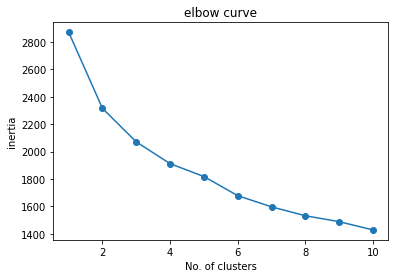

In [ ]:
plt.plot(clusters, inertia, marker = "o")
plt.ylabel("inertia")
plt.xlabel("No. of clusters")
plt.title("elbow curve")
plt.show()

PCA


In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
new_df_2 = df.reset_index().drop(columns = ["status", "salary", "index"], axis = 1)
new_df_2
#for PCA , We have to drop target values

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
1,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
2,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
3,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50
4,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58
...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49
201,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62
202,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72
203,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23


In [ ]:
X_new_df_2 = sc.fit_transform(new_df_2)
X_new_df_2

array([[ 0.73576721,  1.11548834, -0.90230776, ...,  1.11516572,
        -0.88465174,  0.70129364],
       [ 0.73576721, -0.23399126, -0.90230776, ...,  0.23238111,
        -0.88465174, -0.77993941],
       [ 0.73576721, -1.08153602, -0.90230776, ..., -0.4584938 ,
         1.13038833, -0.49522126],
       ...,
       [ 0.73576721, -0.04564798,  1.10826931, ..., -0.99584095,
        -0.88465174,  1.30217119],
       [-1.35912554,  0.6135535 ,  1.10826931, ..., -0.15143828,
         1.13038833, -0.3554823 ],
       [ 0.73576721, -0.51650618, -0.90230776, ...,  1.30707541,
         1.13038833, -0.35722904]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 8)
#we are selecting only 8 PC from total 12 PC because there are total 12 features.

In [ ]:
principal_components = pca.fit_transform(X_new_df_2)
principal_components
#now data is changed from features to PC, having total 8 PC (i.e 8 columns)

array([[ 3.14880732,  0.75646031,  0.90299365, ..., -0.04151618,
        -0.15030194,  0.26170642],
       [-1.06007473, -2.56544591, -0.32994279, ...,  0.12595066,
         0.56394566, -0.40768428],
       [-2.65363294,  1.51227053,  2.23619003, ...,  0.67296579,
         0.03451805, -1.1118139 ],
       ...,
       [ 1.06027703, -0.12177957, -1.77768005, ..., -0.52630348,
        -0.10262829, -0.30099076],
       [-0.73481506,  0.28849627, -1.08157223, ..., -0.19363098,
        -0.59236195, -0.05336822],
       [-1.63864314,  0.95997941,  0.2681796 , ...,  1.10136149,
        -1.45531373,  0.02320076]])

In [ ]:
pca.explained_variance_ratio_

array([0.22085019, 0.15671289, 0.12748986, 0.10893118, 0.08255005,
       0.06781951, 0.06089008, 0.04708314])

In [ ]:
pca.explained_variance_ratio_.sum()
#it is having 87 % of total information of dataset

0.8723269035779067

In [ ]:
pca_df = pd.DataFrame(data = principal_components, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.148807,0.756460,0.902994,-1.526642,0.264788,-0.041516,-0.150302,0.261706
1,-1.060075,-2.565446,-0.329943,-1.037919,-0.596208,0.125951,0.563946,-0.407684
2,-2.653633,1.512271,2.236190,-0.590306,-0.293376,0.672966,0.034518,-1.111814
3,1.316958,-1.885649,0.452190,-1.506366,-2.082834,-0.034364,0.459912,0.944590
4,-1.315106,2.723592,-0.488442,-1.506400,1.593512,-0.436388,1.549264,1.009022
...,...,...,...,...,...,...,...,...
200,3.271480,-0.853141,-1.730507,0.263958,-1.223473,0.189587,-0.446803,-0.919793
201,-0.262105,2.180834,-0.505733,-0.962779,-0.849113,-0.087649,1.676393,0.561082
202,1.060277,-0.121780,-1.777680,-0.171078,1.758863,-0.526303,-0.102628,-0.300991
203,-0.734815,0.288496,-1.081572,1.752983,-0.461228,-0.193631,-0.592362,-0.053368


In [ ]:
final_df = pd.concat([pca_df, df.reset_index()[["status", "salary"]]], axis = 1)
final_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,status,salary
0,3.148807,0.756460,0.902994,-1.526642,0.264788,-0.041516,-0.150302,0.261706,1,200000.0
1,-1.060075,-2.565446,-0.329943,-1.037919,-0.596208,0.125951,0.563946,-0.407684,1,250000.0
2,-2.653633,1.512271,2.236190,-0.590306,-0.293376,0.672966,0.034518,-1.111814,0,0.0
3,1.316958,-1.885649,0.452190,-1.506366,-2.082834,-0.034364,0.459912,0.944590,1,425000.0
4,-1.315106,2.723592,-0.488442,-1.506400,1.593512,-0.436388,1.549264,1.009022,0,0.0
...,...,...,...,...,...,...,...,...,...,...
200,3.271480,-0.853141,-1.730507,0.263958,-1.223473,0.189587,-0.446803,-0.919793,1,400000.0
201,-0.262105,2.180834,-0.505733,-0.962779,-0.849113,-0.087649,1.676393,0.561082,1,275000.0
202,1.060277,-0.121780,-1.777680,-0.171078,1.758863,-0.526303,-0.102628,-0.300991,1,295000.0
203,-0.734815,0.288496,-1.081572,1.752983,-0.461228,-0.193631,-0.592362,-0.053368,1,204000.0


In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
5,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
#now checking for accuracy of linear regg model (it will give low accuracy after using PCA)

In [ ]:
X_final = final_df.iloc[:, 0:-2]
X_final

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.148807,0.756460,0.902994,-1.526642,0.264788,-0.041516,-0.150302,0.261706
1,-1.060075,-2.565446,-0.329943,-1.037919,-0.596208,0.125951,0.563946,-0.407684
2,-2.653633,1.512271,2.236190,-0.590306,-0.293376,0.672966,0.034518,-1.111814
3,1.316958,-1.885649,0.452190,-1.506366,-2.082834,-0.034364,0.459912,0.944590
4,-1.315106,2.723592,-0.488442,-1.506400,1.593512,-0.436388,1.549264,1.009022
...,...,...,...,...,...,...,...,...
200,3.271480,-0.853141,-1.730507,0.263958,-1.223473,0.189587,-0.446803,-0.919793
201,-0.262105,2.180834,-0.505733,-0.962779,-0.849113,-0.087649,1.676393,0.561082
202,1.060277,-0.121780,-1.777680,-0.171078,1.758863,-0.526303,-0.102628,-0.300991
203,-0.734815,0.288496,-1.081572,1.752983,-0.461228,-0.193631,-0.592362,-0.053368


In [ ]:
Y_final = final_df.iloc[:, -1]
Y_final

0      200000.0
1      250000.0
2           0.0
3      425000.0
4           0.0
         ...   
200    400000.0
201    275000.0
202    295000.0
203    204000.0
204         0.0
Name: salary, Length: 205, dtype: float64

In [ ]:
X_final_train, X_final_test, Y_final_train, Y_final_test = train_test_split(X_final, Y_final, test_size = 0.3, random_state = 1)

In [ ]:
lin_ = LinearRegression()
lin_.fit(X_final_train, Y_final_train)

LinearRegression()

In [ ]:
Predict_final = lin_.predict(X_final_test)
Predict_final

array([244096.62533435, 177133.07582974, 185696.9153077 , 204768.40404799,
       294759.63320602, 259043.82034944, 252663.16289776, 228192.38437176,
       247863.61244064, 280409.68166154, 262595.13048301, 300191.81724958,
       290000.56896665, 299721.63357278,  90596.80129352, 153911.77132497,
       156017.78926612, 170684.67333013, 379183.43864493, 253168.49820535,
       163874.52932486, 303004.08395722,  11125.6838791 , 237188.13291935,
        43484.78290427,  95385.63054514, 118674.61172833, 229587.07822491,
       224684.85562057, 224950.53804971,  62965.04984323, 183441.11863849,
       103630.34805693,  42548.22308367, 162773.15969808, 159996.12856915,
       201066.70169072,  59027.64051069, 275868.50358629,  66918.612665  ,
       120129.77222888, 208052.75624561, 209063.23587116, 195897.56625572,
        62410.0320564 , 266586.15681875, 347631.70056551, 191531.85620111,
       162631.77526439, 337503.40548082, 303451.26767313,  97392.6573429 ,
       225657.06607539,  

In [ ]:
from sklearn import metrics
print("R2:", metrics.explained_variance_score(Y_final_test, Predict_final))
print("MSE:", metrics.mean_squared_error(Y_final_test, Predict_final))



R2: 0.2731267501950414
MSE: 13852677586.776325


In [ ]:
#for clustering and PCA, it is must to remove outliers and to do scaling